In [1]:
%matplotlib inline
from pjr import *

In [3]:
fname = "/Users/d3x345/Downloads/SWE_data/sierra_swe.nc"
fname = "/Users/d3x345/Downloads/SWE_data/nrockies_swe.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
print "dims", dims;
print "varlist", varlist;

time =  g2('time')
days = g2['days'][:]
year = np.zeros((days.size), dtype=int)
mon = np.zeros((days.size), dtype=int)
daym = np.zeros((days.size), dtype=int)

for day in days:
#    print "day", day
    iday = int(day)
    t1 = time[:,iday]
#    print "time 1", t1
    if t1[0] == '':
        print "empty day, no leapyear"
        break;
    t2 = ''.join(t1)
#    print "time 2", day, t2
    year[iday] = int(''.join(t1[0:4]))
    mon[iday] = int(''.join(t1[5:7]))
    daym[iday] = int(''.join(t1[8:10]))
    
# pull out month 2 (february) for testing
    indexes = [index for index in range(len(mon)) if mon[index] == 2]

#    print "day, year, mon, daym", day, year, mon, daym
#monarray = time[5:7,:]
#print "monarray", monarray.info()
#a = [''.join(col) for col in time]
#!print "a", a

daymin = days[indexes[0]]
daymax = days[indexes[-1]]
swe =  g2('swe',squeeze=1,days=(daymin,daymax))            # extract fields, remove dimensions length one
avg = cdutil.averager(swe,axis="0",weights="unweighted")
#swed = swe.data
#swedb = swed.mean(axis=0)
#print "sweavg, cdutilavg", swedb.max(),avg.max()

#swe =  g2('elevation',squeeze=1)*conv            # extract fields, remove dimensions length one

#print swe.info()



dims ['charlength', 'south_north', 'days', 'west_east']
varlist ['elevation', 'lon', 'swe', 'mask', 'time', 'lat']


lat2*** Description of Slab lat ***
id: lat
shape: (621, 525)
filename: /Users/d3x345/Downloads/SWE_data/nrockies_swe.nc
missing_value: None
comments: 
grid_name: N/A
grid_type: N/A
time_statistic: 
long_name: 
units: degrees_north
coordinates: XLONG XLAT
No grid present.
** Dimension 1 **
   id: south_north
   units:  
   Length: 621
   First:  0.0
   Last:   620.0
   Other axis attributes:
      realtopology: linear
   Python id:  0x181197cd10
** Dimension 2 **
   id: west_east
   units:  
   Length: 525
   First:  0.0
   Last:   524.0
   Other axis attributes:
      realtopology: linear
   Python id:  0x181197ccd0
*** End of description for lat ***
 None


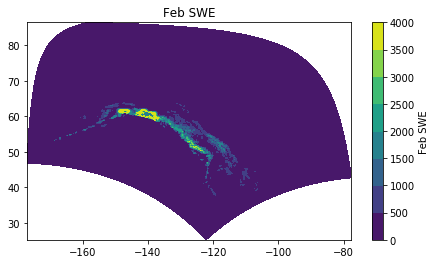

In [5]:
lat2 = g2['lat']
lon2 = g2['lon']
print "lat2", lat2.info()
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("Feb SWE")
cs = plt.contourf(lon2, lat2, avg)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('Feb SWE')
#print "LF2a_av=", cdutil.averager(swe,axis="xy",weights="weighted")
plt.show()

levs [0.0, 1000.0, 2000.0, 5000.0]


Text(0.5,1,'Title w units ($10^{-5} s^{-1}$)\n subtitle')

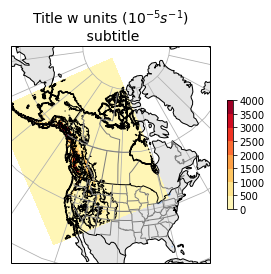

In [35]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plotMap():
    #Set the projection information
    proj = ccrs.LambertConformal(central_longitude=-97.0,central_latitude=53, standard_parallels=[53])
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    #Zoom in
    ax.set_extent([-70, -135, 20, 90])
    
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS, zorder=10)
    ax.add_feature(cfeature.COASTLINE, zorder=10)

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    
    #Add lat/lon gridlines every 20° to the map
    ax.gridlines(xlocs=np.arange(0,361,20), ylocs=np.arange(-80,90,20)) 
    
    return fig, ax
# Load the data
ele = g2('elevation')
#Get a new background map figure
fig, ax = plotMap()


levs = np.arange(0.,5.e3,10.e2)
levs = [0.,1.e3, 2.e3,5.e3]
print "levs", levs
ax.contour(lon2, lat2,ele, colors='k', levels=levs, linewidths=1, zorder=3, transform = ccrs.PlateCarree())
avor_contour = ax.contourf(lon2, lat2, avg,  
                           cmap=plt.cm.YlOrRd, zorder=2, transform = ccrs.PlateCarree())
#Create a colorbar and shrink it down a bit.
cb = plt.colorbar(avor_contour, shrink=0.5)
#Change the tick labels
#cb.set_ticklabels(avor_levels*10**5)

#Set the title
ax.set_title('Title w units ($10^{-5} s^{-1}$)\n subtitle', fontsize=14)

#Show the figure
#fig
#plt.show()